# Car Purchasing Data Summary

The car purchasing data comes from Kaggle and, using the data, the goal is to build a predictive model for the total amount that customers are willing to pay for a new car. This model could help for direct marketing. 

## Part 1: Formatting The Data Set

In [17]:
# Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

First, we import the data and check the column data types.

In [18]:
# Import the data set:
path = "../data/Car_Purchasing_Data.csv.xls"
car_data = pd.read_csv(path,  header = 0)

In [19]:
# Check the data types:
car_data.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

Before using the coreset algorithm on this data set, we remove the customer name, e-mail, and country fields. We also make Gender a boolean data type.

In [20]:
#Remove the object data type columns:
car_data = car_data.iloc[:, 3:]

# Make Gender a boolean:
car_data.loc[:,"Gender"] = car_data.Gender.astype("bool")

In [21]:
# Check for missing values:
print(all(car_data.isna() == False))
print(all(car_data.isnull() == False))

True
True


There are no missing values in the data set.

In [22]:
car_data.shape

(500, 6)

The data set that will go through the algorithms has 500 observations with 6 variables. The predictor variables include customer gender, age, annual salary, credit card debt, and networth. The response variable is car purchase amount. 

# Part 2: Descriptive Statistics

In this section, we provided a "concise" overview of the data. First, we identify some summary statistics for each variable. The table below contains the counts, mean, standard deviation, percentiles, minimum, and maximum for each variable.

In [7]:
car_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500,500,500,500,500
mean,46.224,62127.2,9607.65,431476,44209.8
std,7.99034,11703.4,3489.19,173537,10773.2
min,20,20000,100,20000,9000
25%,41,54392,7397.52,299824,37629.9
50%,46,62915.5,9655.04,426750,43997.8
75%,52,70117.9,11798.9,557324,51254.7
max,70,100000,20000,1e+06,80000


Some interesting details are the mean customer age is 46.2, max customer age is 70, the average customer salary is \\$62,127.20, and the average car price is \\$4,4209.80.

Next, we look at the correlations between the variables.

In [8]:
car_data.loc[:, car_data.columns != "Gender"].corr()

,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Age,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,0.633273,0.617862,0.028882,0.488580,1.000000


The predictor variable is "Car Purchase Amount" and we can see that "Credit Card Debt" is the only variable that has almost no linear correlation with "Car Purchase Amount". "Age", "Annual Salary", and "Net Worth" have a positive moderate correlation with "Car Purchase Amount". Lastly, the predictor variables have almost no correlation between each other,

## Boxplot For Gender

We create side-by-side boxplots for  Gender.

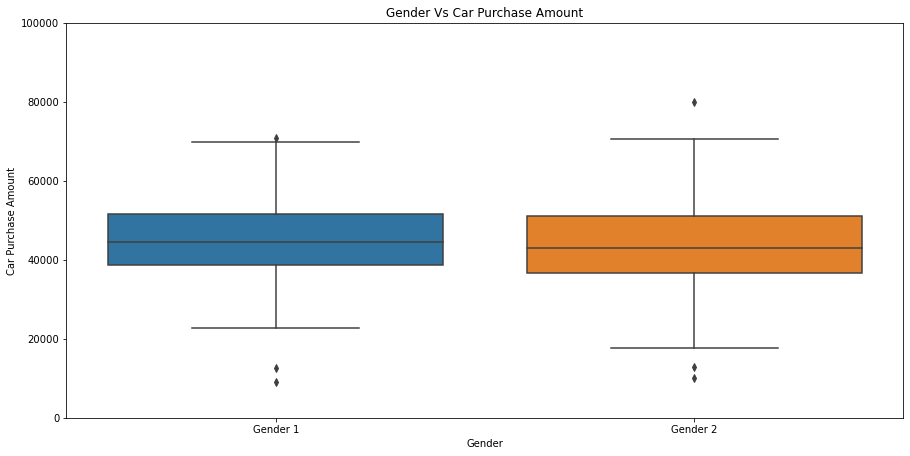

In [9]:
plt.figure(figsize = (15, 7.27));
plt.ylim((0, 100000));
box_plot = sns.boxplot(x = "Gender", y = "Car Purchase Amount", data = car_data);
box_plot.set_xticks(range(0,2));
box_plot.set_xticklabels(['Gender 1','Gender 2']);
plt.title("Gender Vs Car Purchase Amount");

There is not a visible difference between the genders and the purchase price. In other words, men and women purchase cars at about the same price points. For both genders, there are only a few outliers for 'Car Purchase Amount'.

## Histogram/Kernel Density Plots For Numeric Variables

In [10]:
# Function to generate the histograms:
def create_histo():
    """
     This function creates a histogram with the kernel density line for each numeric variable in the 
     car purchasing data set.
    """
    fig_new, axs = plt.subplots(nrows=2, ncols= 3, figsize = (15, 10.27))
    var_start_index = 0
    for i in range(0,2):
        for j in range(0,3):
            sns.histplot(car_data.loc[:,car_data.columns[car_data.dtypes != "bool"][var_start_index]], kde = True, 
                        color = 'darkblue', ax = axs[i,j])
            axs[i,j].set_title(car_data.columns[car_data.dtypes != "bool"][var_start_index] + " Histogram")
            axs[i,j].xaxis.set_major_locator(mticker.MaxNLocator(5))
            ticks_loc = axs[i,j].get_xticks().tolist()
            axs[i,j].xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
            axs[i,j].set_xticklabels([str(int(x/1000)) + "K" if int(x) > 1000 else x for x in ticks_loc])
            var_start_index += 1
            if var_start_index == 5:
                return()

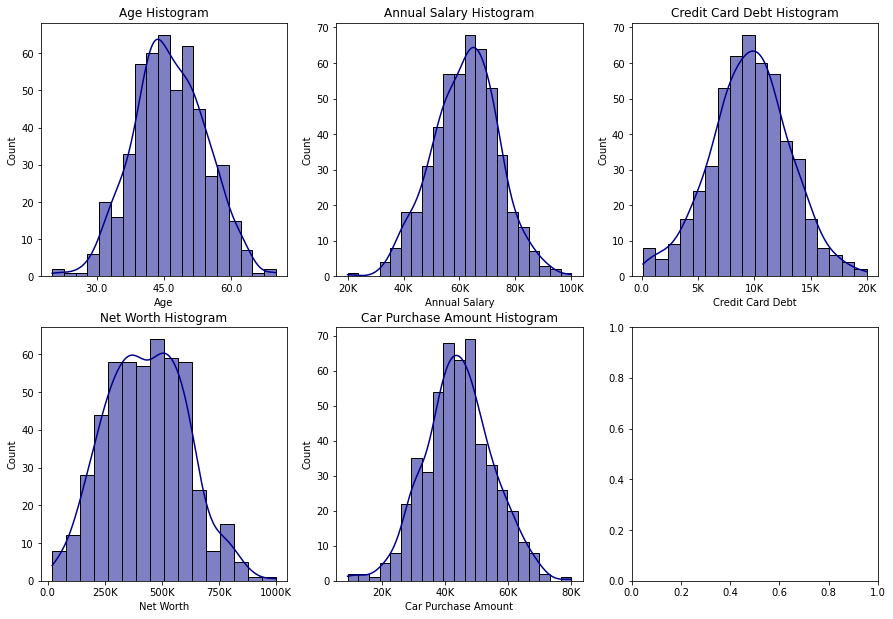

In [11]:
create_histo();

The distributions for the numeric variables seem to be relatively close to a normal distribution. For each variable, there does not appear to be outliers affecting the distributions(No severly skewed right/left distributions).